<a href="https://colab.research.google.com/github/anarebli/IA-DevIA/blob/main/Aula04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Kaggle - é um repositório de diversos dataset

# Nova seção

In [1]:
!unzip titanic.zip

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import pandas as pd
data = pd.read_csv("train.csv")
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [3]:
y =  data['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [4]:
X = data.drop('Survived', axis=1)
X.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
#procura quantos elementos tem repetidos]
for column in X.columns:
    print(f'{column:>12} {len(set(X[column])):4} {X[column].dtypes}')

 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


In [6]:
#eliminando algumas caracteristicas do dataset e colocando no novo dtset Xdrop
indesejadas = ['PassengerId', 'Name','Ticket','Cabin']
Xdrop = X.drop(indesejadas, axis=1)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [7]:
#separando os datasets só os numéricos
Xnum = Xdrop.select_dtypes('number')
Xnum.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [8]:
#procurando se tem alguma caracteristica inválida
for column in Xnum.columns:
    print(f'{column:>12} {sum(Xnum[column].isnull())}')

      Pclass 0
         Age 177
       SibSp 0
       Parch 0
        Fare 0


In [9]:
#colocando o valor da mediana das idades nos valores que sao nulos
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
XnumLimpo = imputer.fit_transform(Xnum)
XnumLimpo

array([[ 3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [10]:
#tratando os atributos categorios
Xcat = Xdrop.select_dtypes('object')
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [11]:
#procurando se tem alguma caracteristica inválida
for column in Xcat.columns:
    print(f'{column:>12} {sum(Xcat[column].isnull())}')

         Sex 0
    Embarked 2


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
XcatLimpo = imputer.fit_transform(Xcat)
XcatLimpo

array([['male', 'S'],
       ['female', 'C'],
       ['female', 'S'],
       ...,
       ['female', 'S'],
       ['male', 'C'],
       ['male', 'Q']], dtype=object)

In [13]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
XcatHot = encoder.fit_transform(XcatLimpo)
XcatHot

<891x5 sparse matrix of type '<class 'numpy.float64'>'
	with 1782 stored elements in Compressed Sparse Row format>

In [14]:
XcatHot.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [15]:
import numpy as np
Xtratado = np.c_[XnumLimpo, XcatHot.toarray()]
Xtratado.shape

(891, 10)

In [16]:
Xtratado

array([[ 3., 22.,  1., ...,  0.,  0.,  1.],
       [ 1., 38.,  1., ...,  1.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 28.,  1., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  0.,  1.,  0.]])

In [17]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.columns.isin(test.columns)

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [18]:
train.columns[~train.columns.isin(test.columns)]

Index(['Survived'], dtype='object')

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

class AtributosDesejados (BaseEstimator, TransformerMixin):
    def fit (self, X, y=None):
        self.colunasIndesejadas_ = ['PassengerId', 'Name','Ticket','Cabin']
        return self
    def transform(self, X, y=None):
        return X.drop(self.colunasIndesejadas_, axis=1)


atributosDesejados = AtributosDesejados()
Xdrop =  atributosDesejados.fit_transform(X)
Xdrop.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [20]:
#separar o q é categorico de numérico
from sklearn.base  import  BaseEstimator, TransformerMixin

class AtributosNumericos (BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.colunasNumericas = X.select_dtypes(include='number').columns
        return self

    def transform(self, X, y=None):
        return X[self.colunasNumericas]

atributosNumericos = AtributosNumericos()
Xnum = atributosNumericos.fit_transform(Xdrop)
Xnum.columns


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('atributos_numericos', AtributosNumericos()),
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

XnumLimpo = pipeline.fit_transform(Xdrop)
XnumLimpo

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [22]:
from sklearn.base  import BaseEstimator,TransformerMixin

class AtributosCategoricos(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.colunasCategoricas = X.select_dtypes(include='object').columns
        return self

    def transform(self, X, y=None):
        return X[self.colunasCategoricas]

atributosCategoricos = AtributosCategoricos()
Xcat= atributosCategoricos.fit_transform(Xdrop)
Xcat.columns

Index(['Sex', 'Embarked'], dtype='object')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

pipecat = Pipeline([
    ('atributos_categoricos', AtributosCategoricos()),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder())
])

XcatLimpo = pipecat.fit_transform(Xdrop)
XcatLimpo.toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [24]:
from sklearn.pipeline import FeatureUnion

unecaracteristicas = FeatureUnion([
    ('pipeline', pipeline),
    ('pipecat', pipecat)
])

Xtratado = unecaracteristicas.fit_transform(Xdrop)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [25]:
from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
from sklearn.pipeline import Pipeline

preproc = Pipeline([
    ('atributos_desejados', AtributosDesejados()),
    ('unecaracteristicas', unecaracteristicas)
])

Xtratado = preproc.fit_transform(X)
Xtratado.toarray()

array([[ 0.82737724, -0.56573646,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.43279337, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.4745452 , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337, ...,  0.        ,
         0.        ,  1.        ],
       [-1.56610693, -0.25833709, -0.4745452 , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.82737724,  0.20276197, -0.4745452 , ...,  0.        ,
         1.        ,  0.        ]])

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pipetotal = Pipeline([
    ('preproc', preproc),
    ('arvore', DecisionTreeClassifier())
])

pipetotal.fit(X, y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

0.9797979797979798

In [28]:
import numpy as np
from sklearn.model_selection import cross_validate

scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])

({'fit_time': array([0.02284122, 0.02268267, 0.01636624, 0.01614594, 0.01613259]),
  'score_time': array([0.00709462, 0.00664973, 0.00681591, 0.0082736 , 0.00676394]),
  'test_score': array([0.74860335, 0.7752809 , 0.80337079, 0.73595506, 0.81460674])},
 0.7755633670202748)

In [29]:
pipetotal.fit(X, y)
ypred = pipetotal.predict(test)

submission = pd.read_csv('gender_submission.csv')
submission['Survived'] = ypred
submission.to_csv('tree_submission.csv', index=False)

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'arvore__max_depth': [None, 1, 3, 5, 7, 9],
    'preproc__unecaracteristicas__pipeline__imputer__strategy': ['mean', 'median', 'most_frequent']
}

modelo = GridSearchCV(pipetotal, param_grid=parametros)

scores = cross_validate(modelo, X, y)
scores, np.mean(scores['test_score'])

In [ ]:
modelo.fit(X, y)
modelo.best_estimator_

In [ ]:
submission = pd.read_csv('gender_submission.csv')
ypred = modelo.predict(test)
submission['Survived'] = ypred
submission.to_csv('tree_gscv_submission.csv', index=False)

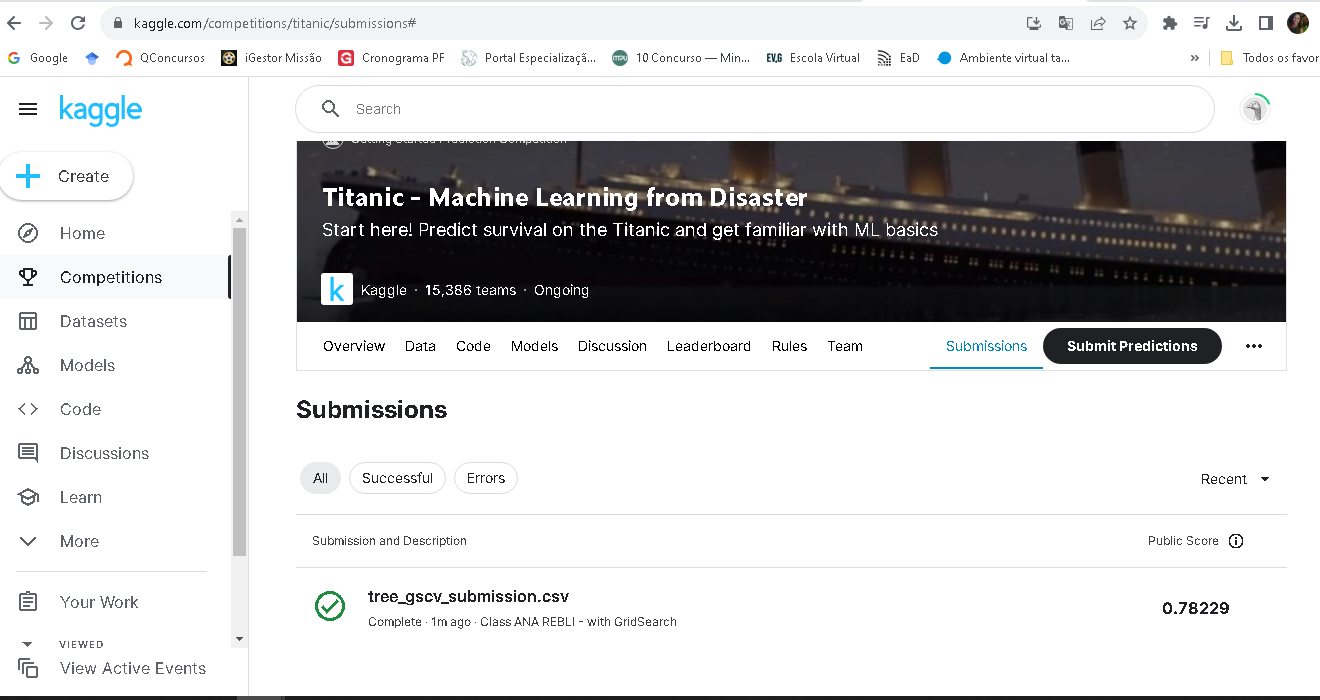

Usando o classificador SVC - Support Vector Classifier

In [ ]:
from sklearn.svm import SVC #importando o classificador SVM

In [ ]:
pipetotal = Pipeline([
    ('prepoc', preproc),
    ('svm', SVC())
]) #atualizando o pipetotal, substituindo pelo novo classificador

In [ ]:
#treinando e avaliando o modelo
pipetotal.fit(X,y)
ypred = pipetotal.predict(X)
accuracy_score(y, ypred)

In [ ]:
scores = cross_validate(pipetotal, X, y)
scores, np.mean(scores['test_score'])
#validação cruzada e retornando a média das pontuações de desempenho da série.

In [ ]:
# Ajustando hiperparâmetros com GridSearchCV
parametros_svm = {
    'svm__C': [0.1, 1, 10],  # Exemplo de hiperparâmetros para o SVM
    'svm__kernel': ['linear', 'rbf']  # Exemplo de kernel para o SVM
}

modelo_svm = GridSearchCV(pipetotal, param_grid=parametros_svm)


In [ ]:
# Realizando a validação cruzada com o modelo SVM
scores_svm = cross_validate(modelo_svm, X, y)
scores_svm, np.mean(scores_svm['test_score'])


In [ ]:
# Treinando o modelo SVM com os melhores hiperparâmetros
modelo_svm.fit(X, y)
modelo_svm.best_estimator_

In [ ]:
# Gerando as previsões e criando o arquivo de submissão
submission_svm = pd.read_csv('gender_submission2.csv')
ypred_svm = modelo_svm.predict(test)
submission_svm['Survived'] = ypred_svm
submission_svm.to_csv('svm_gscv_submission2.csv', index=False)